NOTE: The python script https://github.com/ankushjain2001/NYU-Tandon-Bridge-NLP/blob/main/data_pipelines/piazza_data_splitter_pipeline.py is created from this notebook. It just contains the preprocessing part and not the data analysis. 

In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
# Extracts followups from the post data 
def extract_followup_post(fu, level, post_id, tags, instr_candidate):
    fu_doc = {}
    try:
        fu_doc['post_id'] = post_id
    except:
        pass
    try:
        fu_doc['followup_id'] = fu['id']
    except:
        pass
    try:
        fu_doc['followup_level'] = level
    except:
        pass
    try:
        fu_doc['anon'] = fu['anon']
    except:
        try:
            fu_doc['anon'] = fu['history'][0]['anon']
        except:
            pass
    try:
        fu_doc['subject'] = fu['subject']
    except:
        try:
            fu_doc['subject'] = fu['history'][0]['subject']
        except:
            pass
    try:
        fu_doc['content'] = fu['content']
    except:
        try:
            fu_doc['content'] = fu['history'][0]['content']
        except:
            pass
    try:
        fu_doc['data'] = fu['data']
    except:
        pass
    try:
        fu_doc['created'] = fu['created']
    except:
        pass
    try:
        fu_doc['type'] = fu['type']
    except:
        pass
    try:
        fu_doc['uid'] = fu['uid']
    except:
        try:
            fu_doc['uid'] = fu['history'][0]['uid']
        except:
            pass
    try:
        if 'instructor-note' in tags:
            if fu['uid'] == instr_candidate: 
                fu_doc['is_instructor'] = True
            else:
                fu_doc['is_instructor'] = False    
        else:
            fu_doc['is_instructor'] = False
    except:
        pass
    return fu_doc




In [3]:
# Load JSON
with open('piazza_bridge_s20_24_raw_data.json', 'r') as f:
    data = json.load(f)

In [4]:
# Extract the information about 
data_creator = []
data_posts = []
data_followups = []

for i in data:
    # Extract user who created the post
    for j in i['change_log']:
        if j['type'] == 'create':
            data_creator.append(j)
        
        
    # Extract post data
    data_posts.append(i['history'][0])
    data_posts[-1]['post_id'] = i['id']

    # Flag the creator as instructor if "instructor-note" tag is present
    if 'instructor-note' in i['tags']:
        data_creator[-1]['is_instructor'] = True
        data_posts[-1]['is_instructor'] = True
    else:
        data_creator[-1]['is_instructor'] = False
        data_posts[-1]['is_instructor'] = False
    
    # Extract followup data
    # if i['status'] != 'private':
    # Followup level 1
    for fu1 in i['children']:
        fu1_doc = extract_followup_post(fu1, 1, i['id'], i['tags'], i['history'][0]['uid'])
        if 'content' in fu1_doc or 'subject' in fu1_doc:
            data_followups.append(fu1_doc)
        # Followup level 2 (replies to followup)
        for fu2 in fu1['children']:
            fu2_doc = extract_followup_post(fu2, 2, i['id'], i['tags'], i['history'][0]['uid'])
            if 'content' in fu2_doc or 'subject' in fu2_doc:
                data_followups.append(fu2_doc)
            
            # Redundant level - no data found at this level in any post
            # for fu3 in fu2['children']:
            #     fu3_doc = extract_followup_post(fu3, 3, i['id'])
            #     if 'content' in fu3_doc or 'subject' in fu3_doc:
            #         data_followups.append(fu3_doc)

In [5]:
# Convert to dataframe
df_creator = pd.DataFrame(data_creator)
df_posts = pd.DataFrame(data_posts)
df_followups = pd.DataFrame(data_followups)

df_posts.to_csv('piazza_posts_data.csv')
df_followups.to_csv('piazza_followups_data.csv')


df_all_participation = pd.concat([df_posts[['uid', 'anon', 'is_instructor']], df_followups[['uid', 'anon', 'is_instructor']]])
df_all_participation.reset_index(inplace=True)


### POST CREATOR STATS

740


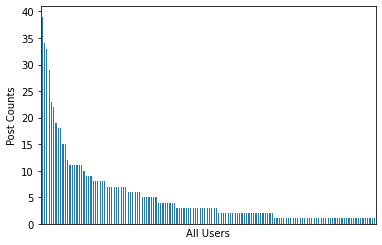

In [6]:

statA_1_global_post_creator_count = df_creator['uid'].value_counts()
statA_1_global_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='All Users',
                                      ylabel='Post Counts')
print(statA_1_global_post_creator_count.sum())


In [7]:

statA_2_instructor_post_creator_count = df_creator[df_creator['is_instructor'] == True]['uid'].value_counts()
print(statA_2_instructor_post_creator_count.sum())



72


668


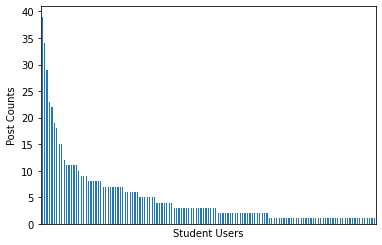

In [8]:
statA_3_student_post_creator_count = df_creator[df_creator['is_instructor'] == False]['uid'].value_counts()
statA_3_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Student Users',
                                      ylabel='Post Counts')
print(statA_3_student_post_creator_count.sum())



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


525


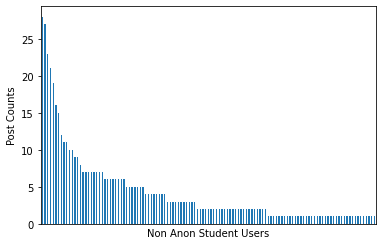

In [9]:
statA_4_non_anon_student_post_creator_count = df_creator[df_creator['is_instructor'] == False ][df_creator['anon'] == 'no']['uid'].value_counts()
statA_4_non_anon_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Non Anon Student Users',
                                      ylabel='Post Counts')
print(statA_4_non_anon_student_post_creator_count.sum())



143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


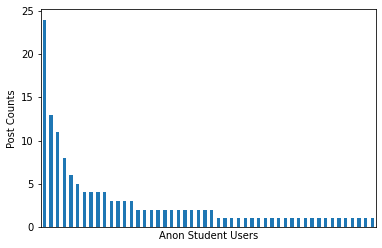

In [10]:
statA_5_anon_student_post_creator_count = df_creator[df_creator['is_instructor'] == False ][df_creator['anon'] == 'stud']['uid'].value_counts()
statA_5_anon_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Anon Student Users',
                                      ylabel='Post Counts')
print(statA_5_anon_student_post_creator_count.sum())

### ALL PARTICIPATIONS STATS

2547


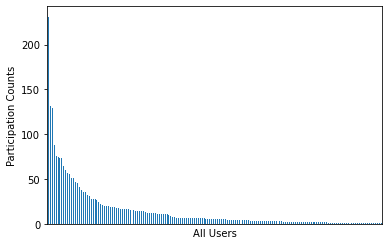

In [12]:
statB_1_global_post_creator_count = df_all_participation['uid'].value_counts()
statB_1_global_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='All Users',
                                      ylabel='Participation Counts')
print(statB_1_global_post_creator_count.sum())



In [13]:
statB_2_instructor_post_creator_count = df_all_participation[df_all_participation['is_instructor'] == True]['uid'].value_counts()
print(statB_2_instructor_post_creator_count.sum())







132


2415


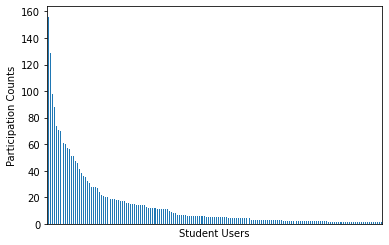

In [14]:
statB_3_student_post_creator_count = df_all_participation[df_all_participation['is_instructor'] == False]['uid'].value_counts()
statB_3_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Student Users',
                                      ylabel='Participation Counts')
print(statB_3_student_post_creator_count.sum())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


2189


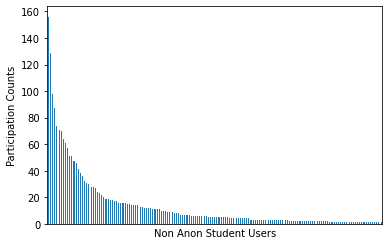

In [15]:
statB_4_non_anon_student_post_creator_count = df_all_participation[df_all_participation['is_instructor'] == False ][df_all_participation['anon'] == 'no']['uid'].value_counts()
statB_4_non_anon_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Non Anon Student Users',
                                      ylabel='Participation Counts')
print(statB_4_non_anon_student_post_creator_count.sum())

226


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


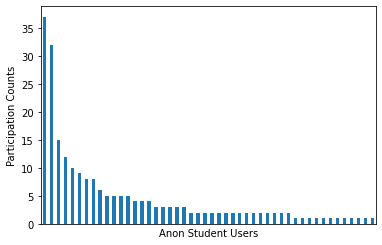

In [16]:
statB_5_anon_student_post_creator_count = df_all_participation[df_all_participation['is_instructor'] == False ][df_all_participation['anon'] == 'stud']['uid'].value_counts()
statB_5_anon_student_post_creator_count.plot(kind='bar', 
                                      xticks=[],
                                      xlabel='Anon Student Users',
                                      ylabel='Participation Counts')
print(statB_5_anon_student_post_creator_count.sum())

### POST LENGTHS

In [17]:
df_posts['unique_id'] = df_posts['post_id']
df_followups['unique_id'] = df_followups['followup_id']

df_posts['length_subj'] = df_posts['subject'].apply(lambda x: len(x))
df_posts['length_cont'] = df_posts['content'].apply(lambda x: len(x))
df_posts['length'] = df_posts['length_subj'] + df_posts['length_cont']


df_followups['length_subj'] = df_followups['subject'].apply(lambda x: len(x))
df_followups['length_cont'] = df_followups['content'].apply(lambda x: 0 if type(x)!=str else len(x))
df_followups['length'] = df_followups['length_subj'] + df_followups['length_cont']

<AxesSubplot:xlabel='All Users', ylabel='Post Length'>

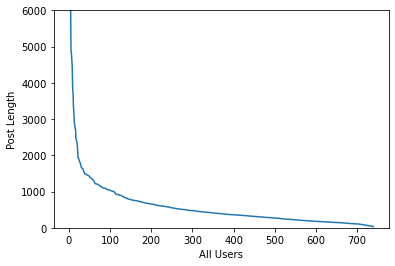

In [18]:
statC_1_global_post_length = df_posts['length']
statC_1_global_post_length = statC_1_global_post_length.sort_values(ascending=False)
statC_1_global_post_length = statC_1_global_post_length.reset_index(drop=True)
statC_1_global_post_length.describe()
statC_1_global_post_length.plot(
                                      xlabel='All Users',
                                      ylabel='Post Length',
                                      ylim=[0, 6000])

In [19]:
statC_2_instructor_post_length = df_posts[df_posts['is_instructor'] == True]['length']
statC_2_instructor_post_length = statC_2_instructor_post_length.sort_values(ascending=False)
statC_2_instructor_post_length.describe()

count       72.000000
mean      1149.916667
std       3839.874971
min         45.000000
25%        188.500000
50%        370.000000
75%        672.000000
max      31679.000000
Name: length, dtype: float64

<AxesSubplot:xlabel='Students', ylabel='Post Length'>

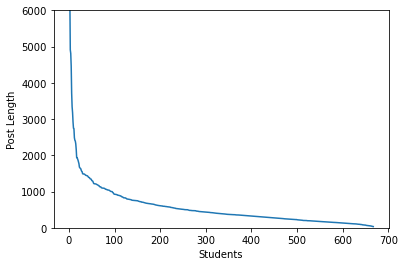

In [20]:
statC_3_student_post_length = df_posts[df_posts['is_instructor'] == False]['length']
statC_3_student_post_length = statC_3_student_post_length.sort_values(ascending=False)
statC_3_student_post_length = statC_3_student_post_length.reset_index(drop=True)
statC_3_student_post_length.describe()
statC_3_student_post_length.plot(xlabel='Students',
                                      ylabel='Post Length',
                                      ylim=[0, 6000])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Non Anon Students', ylabel='Post Length'>

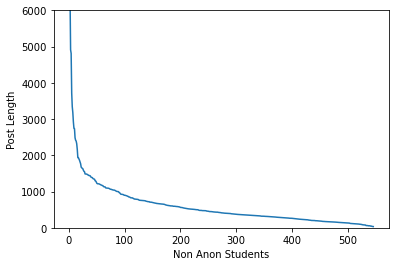

In [21]:
statC_4_non_anon_student_post_length = df_posts[df_posts['is_instructor'] == False][df_posts['anon'] == 'no']['length']
statC_4_non_anon_student_post_length = statC_4_non_anon_student_post_length.sort_values(ascending=False)
statC_4_non_anon_student_post_length = statC_4_non_anon_student_post_length.reset_index(drop=True)
statC_4_non_anon_student_post_length.describe()
statC_4_non_anon_student_post_length.plot(xlabel='Non Anon Students',
                                      ylabel='Post Length',
                                      ylim=[0, 6000])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Anon Students', ylabel='Post Length'>

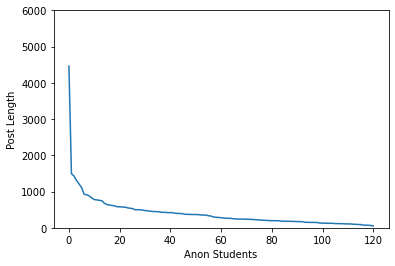

In [22]:
statC_5_anon_student_post_length = df_posts[df_posts['is_instructor'] == False][df_posts['anon'] == 'stud']['length']
statC_5_anon_student_post_length = statC_5_anon_student_post_length.sort_values(ascending=False)
statC_5_anon_student_post_length = statC_5_anon_student_post_length.reset_index(drop=True)
statC_5_anon_student_post_length.describe()
statC_5_anon_student_post_length.plot(xlabel='Anon Students',
                                      ylabel='Post Length',
                                      ylim=[0, 6000])
